In [1]:
import plotly.plotly as py
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

df = pd.read_csv(r'C:\Users\edwar\Documents\Untitled Folder\fipsy_df.csv')
df.head()


,Unnamed: 0,incident_id,date,state,city_or_county,n_killed,n_injured,FIPS
0,0,461105.0,2013-01-01,Pennsylvania,Mckeesport,0,4,42003
1,6,102257.0,2014-01-27,Pennsylvania,Mckeesport,1,0,42003
2,12,180322.0,2014-03-09,Pennsylvania,Mckeesport,0,0,42003
3,18,136970.0,2014-05-17,Pennsylvania,Mckeesport,0,1,42003
4,24,136967.0,2014-05-17,Pennsylvania,Mckeesport,1,0,42003


In [3]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

df = pd.read_csv(r"C:\Users\edwar\Documents\Untitled Folder\fipsy_df.csv")
df.date = pd.to_datetime(df.date)
incidents_by_month = pd.DataFrame(df.groupby(pd.Grouper(key='date', freq='M'))[['n_killed', 'n_injured']].sum())
remove_bad_months = incidents_by_month[12:]
remove_bad_months.head()


,n_killed,n_injured
date,,
2014-01-31,720,1347
2014-02-28,582,904
2014-03-31,655,1163
2014-04-30,682,1398
2014-05-31,752,1580


In [142]:
trace_kill = go.Scatter(
    x=remove_bad_months.index,
    y=remove_bad_months['n_killed'],
    name = "Killed",
    line = dict(color = '#17BECF'),
    opacity = 0.8)


trace_injury = go.Scatter(
    x= remove_bad_months.index,
    y= remove_bad_months['n_injured'],
    name = "Injured",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)

data = [trace_kill, trace_injury]

layout = dict(
    title='Time Series with Rangeslider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Time Series with Rangeslider")

C:\ProgramData\Anaconda3\envs\Data_Science_Learning\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [123]:
df1 = df.groupby(['state'])[['n_killed', 'n_injured']]
df1 = df1.sum()
df1 = df1.reset_index()
df1

,state,n_killed,n_injured
0,Alabama,1538,2649
1,Alaska,235,291
2,Arizona,998,1003
3,Arkansas,313,402
4,California,3176,4840
5,Colorado,529,660
6,Connecticut,266,951
7,Delaware,193,762
8,District of Columbia,445,1411
9,Florida,2242,4242


In [6]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

x0 = df1.n_injured
x1 = df1.n_killed

trace0 = go.Histogram(
    name='Number injured by gun violence',
    x=x0,
    marker=dict(
        color='#FFD7E9',
    ),
    opacity=0.75
)
trace1 = go.Histogram(
    name='Number killed by gun violence',
    x=x1,
     marker=dict(
        color='#EB89B5'
    ),
    opacity=0.75
)


data = [trace0, trace1]
layout = go.Layout(
    title = 'Gun Violence in the US: Count of injured versus killed: 2014-2018',
    xaxis=dict(
        title='Number of incidents'
    ),
    yaxis=dict(
        title='Number of states'
    )
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='gun violence histogram')

In [19]:
def to_unix_time(dt):
    epoch =  datetime.utcfromtimestamp(0)
    return (dt - epoch).total_seconds() * 1000



,n_injured,n_killed
date,,
2013-01-01,10,2
2013-01-05,0,4
2013-01-07,2,6
2013-01-19,0,5
2013-01-21,4,0
2013-01-23,9,2
2013-01-26,11,3
2013-02-02,5,0
2013-02-07,4,0


In [144]:
sum1 = remove_bad_months.groupby(['date'])[['n_injured']].sum()
sum2 = remove_bad_months.groupby(['date'])[['n_killed']].sum()

sum1 = sum1.rename(columns={'n_injured':'incidents'})
sum2 = sum2.rename(columns={'n_killed':'incidents'})

In [145]:
from plotly.grid_objs import Grid, Column


sum = sum1+sum2
sum_final = sum.reset_index()
sum_final.head()

,date,incidents
0,2014-01-31,2067
1,2014-02-28,1486
2,2014-03-31,1818
3,2014-04-30,2080
4,2014-05-31,2332


In [146]:
my_columns = []
for k in range(len(sum_final.date) - 1):
    my_columns.append(Column(list(sum_final.date)[:k + 1], 'x{}'.format(k + 1)))
    my_columns.append(Column(sum_final.incidents[:k + 1], 'y{}'.format(k + 1)))

In [147]:
import time
grid = Grid(my_columns)
py.grid_ops.upload(grid, 'Gun Violence' + str(time.time()), auto_open=False)

'https://plot.ly/~otillieodd/159/'

In [148]:
from datetime import datetime

def to_unix_time(dt):
    epoch =  datetime.utcfromtimestamp(0)
    return (dt - epoch).total_seconds() * 1000

data=[dict(type='scatter',
           xsrc=grid.get_column_reference('x1'),
           ysrc=grid.get_column_reference('y1'),
           name='Gun Violence Incidents',
           mode='lines',
           line=dict(color= 'rgb(38, 130, 142))'),
           fill='tozeroy',
           fillcolor='rgba(59, 82, 139, 0.5)')]

axis=dict(ticklen=4,
          mirror=True,
          zeroline=False,
          showline=True,
          autorange=False,
          showgrid=False)

layout = dict(title='United States: Summary of injury and deaths from gun violence over time',
              font=dict(family='Balto'),
              showlegend=False,
              autosize=False,
              width=800,
              height=400,
              xaxis=dict(axis, **{'nticks':48, 'tickangle':-45,
                                  'range': [to_unix_time(datetime(2014, 1, 31)),
                                            to_unix_time(datetime(2018, 11, 30))]}),
              yaxis=dict(axis, **{'title': 'Number of incidents', 'range':[1000, 4000]}),
              updatemenus=[dict(type='buttons',
                                showactive=False,
                                y=1,
                                x=1.1,
                                xanchor='right',
                                yanchor='top',
                                pad=dict(t=0, r=10),
                                buttons=[dict(label='Play',
                                              method='animate',
                                              args=[None, dict(frame=dict(duration=50, redraw=False), 
                                                               transition=dict(duration=0),
                                                               fromcurrent=True,
                                                               mode='immediate')])])])
 

In [149]:
frames=[{'data':[{'xsrc': grid.get_column_reference('x{}'.format(k + 1)),
                  'ysrc': grid.get_column_reference('y{}'.format(k + 1))}],
         'traces': [0]
        } for k in range(len(sum_final.date) - 1)]

In [150]:
fig=dict(data=data, layout=layout, frames=frames)
py.icreate_animations(fig, 'US_Gun_Violence' + str(time.time()))

C:\ProgramData\Anaconda3\envs\Data_Science_Learning\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(16,18)})

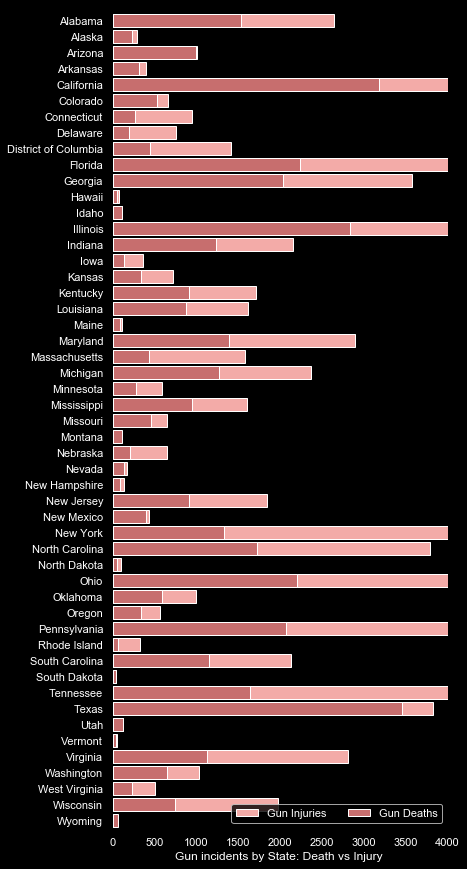

In [154]:

# Initialize the matplotlib figure
plt.style.use('dark_background')
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x='n_injured', y="state", data=df1,
            label="Gun Injuries", color="r")



# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x='n_killed', y="state", data=df1,
            label="Gun Deaths", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 4000), ylabel="",
       xlabel="Gun incidents by State: Death vs Injury ")
sns.despine(left=True, bottom=True)